In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [4]:
# Load the TAPS Management data
taps_planting_data = pd.read_excel('C:\\Priyanka\\hackthone-kansas\\Water-squad\\2024_TAPS_management.xlsx', sheet_name='Planting date', skiprows=1)
taps_nitrogen_data = pd.read_excel('C:\\Priyanka\\hackthone-kansas\\Water-squad\\2024_TAPS_management.xlsx', sheet_name='Nitrogen fertilizer', skiprows=2)
taps_irrigation_data = pd.read_excel('C:\\Priyanka\\hackthone-kansas\\Water-squad\\2024_TAPS_management.xlsx', sheet_name='Irrigation amounts', skiprows=1)

In [5]:
print(taps_planting_data.columns)

print(taps_nitrogen_data.columns)

print(taps_irrigation_data.columns)

Index(['ID', 'Planting Date', 'Company', 'Seeding Rate (plants/ac)'], dtype='object')
Index([               'ID', 2024-04-24 00:00:00,          'Variable',
       2024-06-21 00:00:00, 2024-07-09 00:00:00, 2024-07-16 00:00:00,
       2024-07-22 00:00:00, 2024-08-06 00:00:00,   ' Total (lbs/ac)'],
      dtype='object')
Index([                   'ID',     2024-04-25 00:00:00,
           2024-05-23 00:00:00,     2024-06-11 00:00:00,
           2024-06-18 00:00:00,     2024-06-25 00:00:00,
           2024-07-02 00:00:00,     2024-07-09 00:00:00,
           2024-07-10 00:00:00,     2024-07-16 00:00:00,
           2024-07-17 00:00:00,     2024-07-23 00:00:00,
       '2024-07-23 00:00:00.1',     2024-07-30 00:00:00,
           2024-08-06 00:00:00,     2024-08-07 00:00:00,
           2024-08-13 00:00:00,     2024-08-20 00:00:00,
           2024-08-27 00:00:00,     2024-09-03 00:00:00,
           2024-09-10 00:00:00,                 'Total'],
      dtype='object')


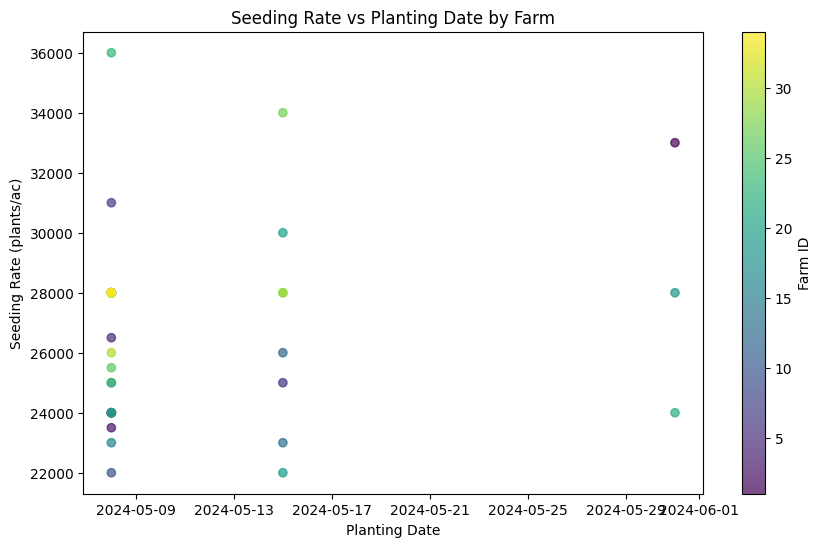

In [11]:
# Plot 1: Scatter Plot for Planting Date and Seeding Rate
plt.figure(figsize=(10, 6))
plt.scatter(taps_planting_data['Planting Date'], taps_planting_data['Seeding Rate (plants/ac)'], c=taps_planting_data['ID'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Farm ID')
plt.xlabel('Planting Date')
plt.ylabel('Seeding Rate (plants/ac)')
plt.title('Seeding Rate vs Planting Date by Farm')
plt.show()

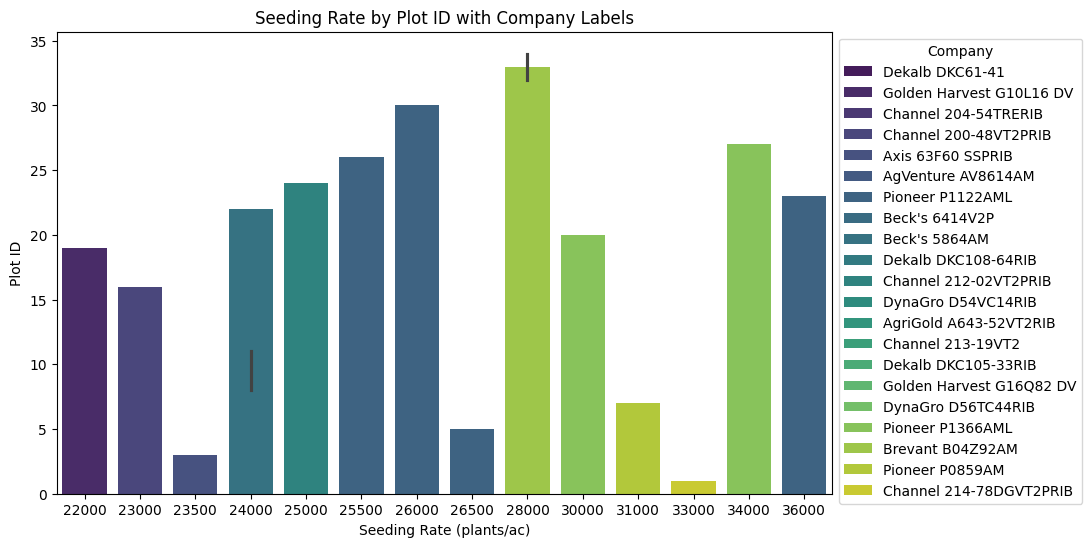

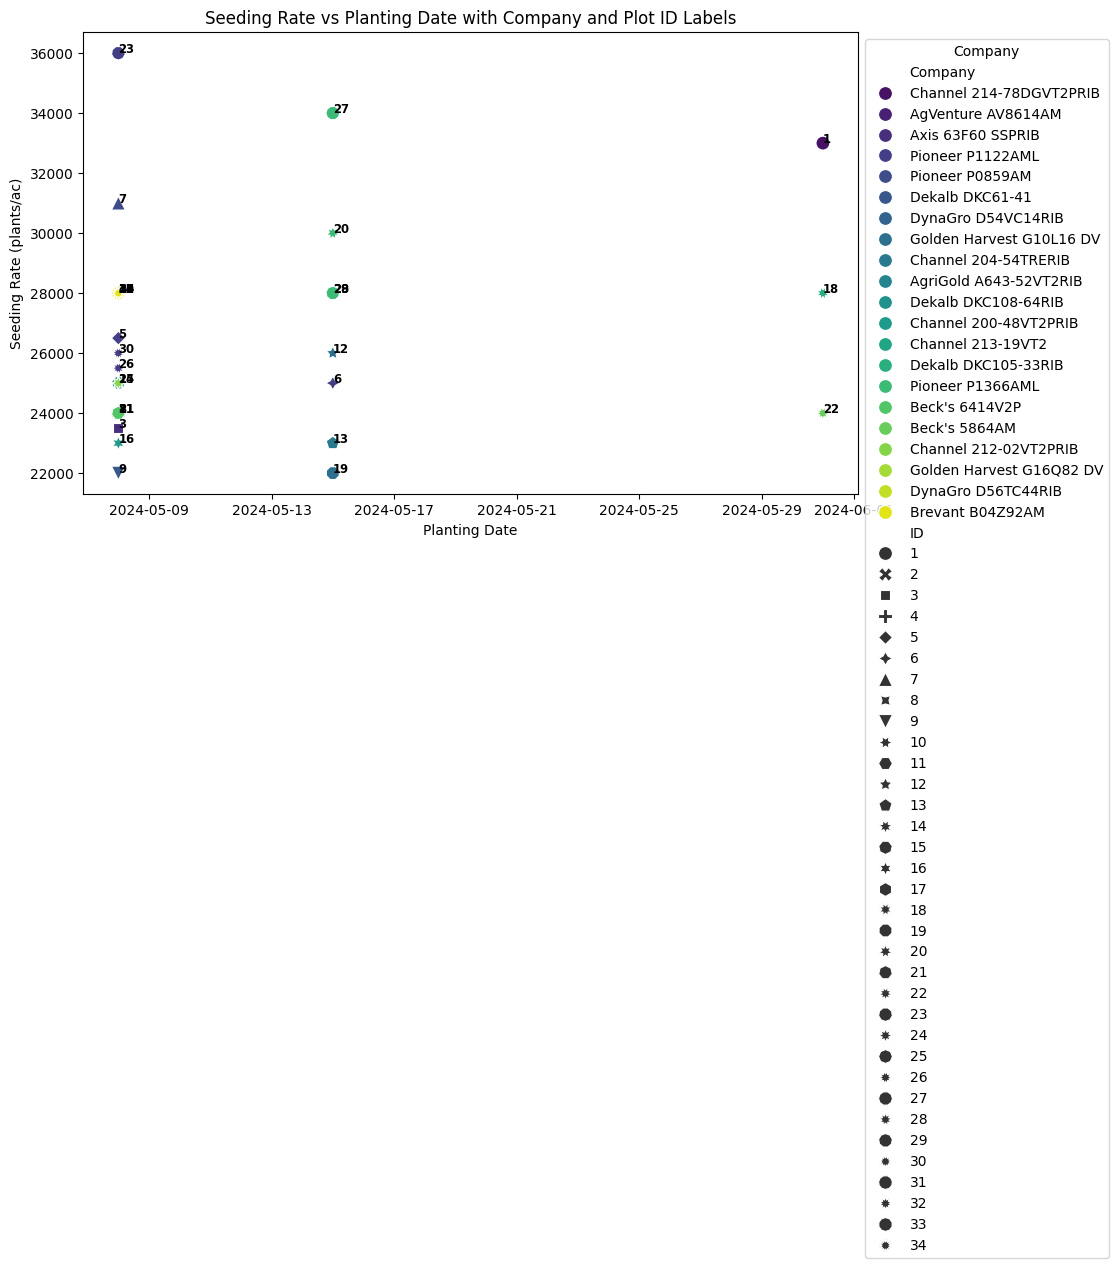

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot 1: Bar Plot with Company Labels for Seeding Rate by Plot ID
plt.figure(figsize=(10, 6))
sns.barplot(
    data=taps_planting_data, x='Seeding Rate (plants/ac)', y='ID', hue='Company', dodge=False,
    palette="viridis"
)
plt.title('Seeding Rate by Plot ID with Company Labels')
plt.xlabel('Seeding Rate (plants/ac)')
plt.ylabel('Plot ID')
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Plot 2: Scatter Plot for Planting Date and Seeding Rate with Company Color and Plot ID Annotation
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=taps_planting_data, x='Planting Date', y='Seeding Rate (plants/ac)',
    hue='Company', palette='viridis', s=100, style='ID'
)
# Annotate plot IDs on each point
for line in range(0, taps_planting_data.shape[0]):
    scatter.text(
        taps_planting_data['Planting Date'].iloc[line],
        taps_planting_data['Seeding Rate (plants/ac)'].iloc[line],
        taps_planting_data['ID'].iloc[line],
        horizontalalignment='left', size='small', color='black', weight='semibold'
    )

plt.title('Seeding Rate vs Planting Date with Company and Plot ID Labels')
plt.xlabel('Planting Date')
plt.ylabel('Seeding Rate (plants/ac)')
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


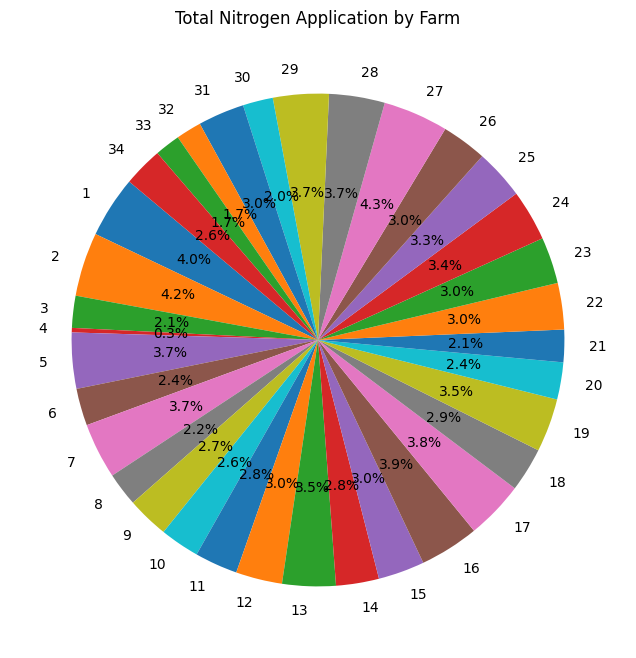

In [14]:
# Plot 2: Pie Chart for Total Nitrogen by Farm ID
nitrogen_totals = taps_nitrogen_data.groupby('ID')[' Total (lbs/ac)'].sum()
plt.figure(figsize=(8, 8))
nitrogen_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Nitrogen Application by Farm')
plt.ylabel('')  # Removing default y-axis label from pie chart
plt.show()

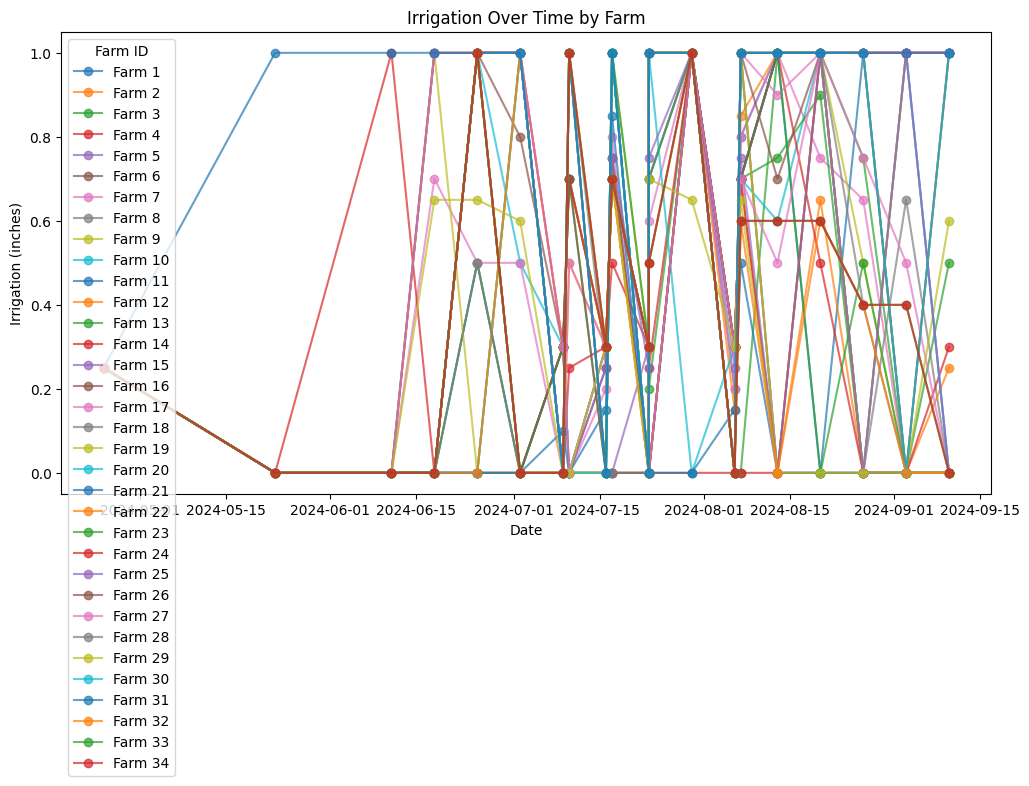

<Figure size 1200x600 with 0 Axes>

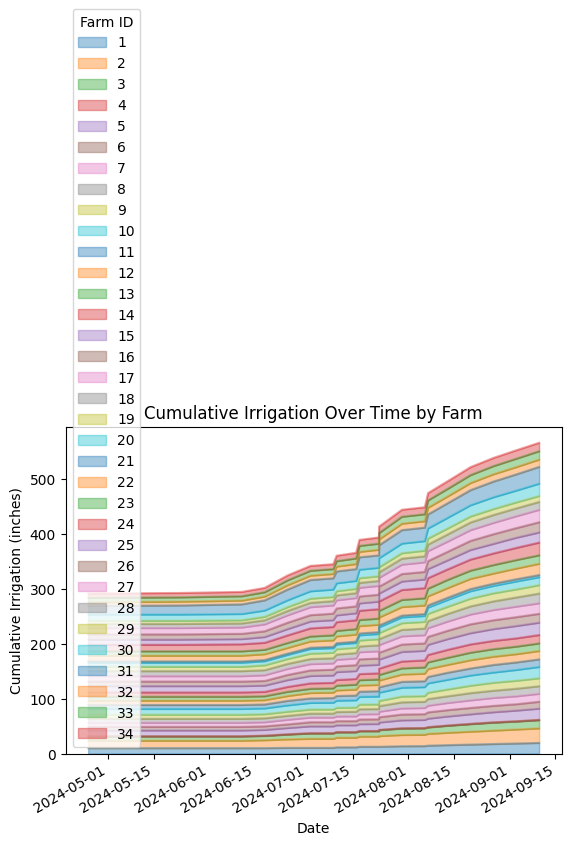

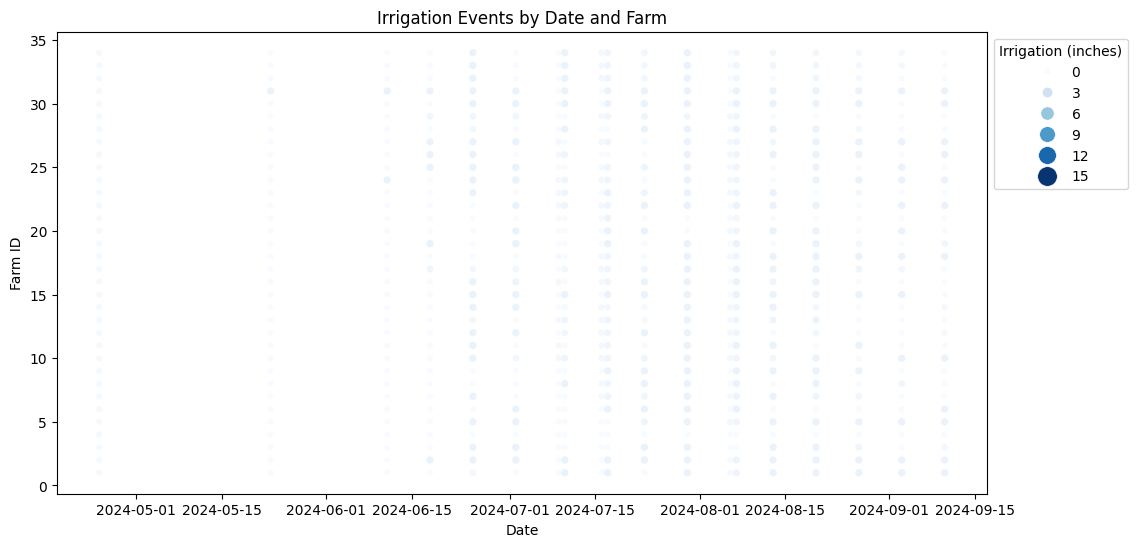

In [15]:
#Plots for Irrigation Data

# Load and reshape the irrigation data
irrigation_long = taps_irrigation_data.melt(id_vars=['ID'], var_name='Date', value_name='Irrigation')
irrigation_long['Date'] = pd.to_datetime(irrigation_long['Date'], errors='coerce')

# Alternative 1: Line Plot by Farm ID for Irrigation over Time
plt.figure(figsize=(12, 6))
for farm_id, data in irrigation_long.groupby('ID'):
    plt.plot(data['Date'], data['Irrigation'], marker='o', label=f'Farm {farm_id}', alpha=0.7)
plt.title('Irrigation Over Time by Farm')
plt.xlabel('Date')
plt.ylabel('Irrigation (inches)')
plt.legend(title='Farm ID')
plt.show()

# Alternative 2: Stacked Area Plot for Cumulative Irrigation Over Time
pivot_irrigation = irrigation_long.pivot(index='Date', columns='ID', values='Irrigation').fillna(0)
cumulative_irrigation = pivot_irrigation.cumsum()

plt.figure(figsize=(12, 6))
cumulative_irrigation.plot.area(alpha=0.4)
plt.title('Cumulative Irrigation Over Time by Farm')
plt.xlabel('Date')
plt.ylabel('Cumulative Irrigation (inches)')
plt.legend(title='Farm ID')
plt.show()

# Alternative 3: Dot Plot for Irrigation Events
plt.figure(figsize=(12, 6))
sns.scatterplot(data=irrigation_long, x='Date', y='ID', size='Irrigation', hue='Irrigation', palette='Blues', legend='brief', sizes=(20, 200))
plt.title('Irrigation Events by Date and Farm')
plt.xlabel('Date')
plt.ylabel('Farm ID')
plt.legend(title='Irrigation (inches)', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [17]:
# Plot 1: Line Plot by Farm ID for Irrigation over Time
def line_plot(irrigation_long):
    plt.figure(figsize=(12, 6))
    for farm_id, data in irrigation_long.groupby('ID'):
        plt.plot(data['Date'], data['Irrigation'], marker='o', label=f'Farm {farm_id}', alpha=0.7)
    plt.title('Irrigation Over Time by Farm')
    plt.xlabel('Date')
    plt.ylabel('Irrigation (inches)')
    plt.legend(title='Farm ID')
    plt.show()

# Plot 2: Stacked Area Plot for Cumulative Irrigation Over Time
def stacked_area_plot(irrigation_long):
    pivot_irrigation = irrigation_long.pivot(index='Date', columns='ID', values='Irrigation').fillna(0)
    cumulative_irrigation = pivot_irrigation.cumsum()
    
    plt.figure(figsize=(12, 6))
    cumulative_irrigation.plot.area(alpha=0.4)
    plt.title('Cumulative Irrigation Over Time by Farm')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Irrigation (inches)')
    plt.legend(title='Farm ID')
    plt.show()

# Plot 3: Dot Plot for Irrigation Events
def dot_plot(irrigation_long):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=irrigation_long, x='Date', y='ID', size='Irrigation', hue='Irrigation', palette='Blues', legend='brief', sizes=(20, 200))
    plt.title('Irrigation Events by Date and Farm')
    plt.xlabel('Date')
    plt.ylabel('Farm ID')
    plt.legend(title='Irrigation (inches)', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


In [18]:
# Dropdown widget to select the plot type
plot_selector = widgets.Dropdown(
    options=['Line Plot', 'Stacked Area Plot', 'Dot Plot'],
    value='Line Plot',
    description='Select Plot:',
    style={'description_width': 'initial'}
)

# Function to update plot based on dropdown selection
def update_plot(plot_type):
    if plot_type == 'Line Plot':
        line_plot(irrigation_long)
    elif plot_type == 'Stacked Area Plot':
        stacked_area_plot(irrigation_long)
    elif plot_type == 'Dot Plot':
        dot_plot(irrigation_long)

# Display widget and link to update function
widgets.interactive(update_plot, plot_type=plot_selector)
